Campaign for selling personal loans

Situation: Thera Bank has a growing customer base. As majority of these customers are liability customers (depositors), the bank is interested in expanding borrowers (asset customers)to bring in more loan business and in the process, earn more through the interest on loans. The management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).  

Complication: A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. However the same campaign may not very be cost effective. 

Question: The retail marketing department wants to devise campaigns with better target marketing to increase the success ratio with minimal budget. What would be the right approach? 

Solution: Build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

In [10]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from scipy.stats import zscore
%matplotlib inline

In [3]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name="Data")

In [4]:
df.set_index("ID",inplace=True)

In [5]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
#Checking if all the values are numerical
df[~df.applymap(np.isreal).all(1)]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,


In [8]:
#Finding missing values in data set (No missed values found)
na_cols = {}
for col in df.columns:
    missed = df.shape[0] - df[col].dropna().count()
    if missed > 0:
        na_cols[col] = missed
na_cols

{}

In [9]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


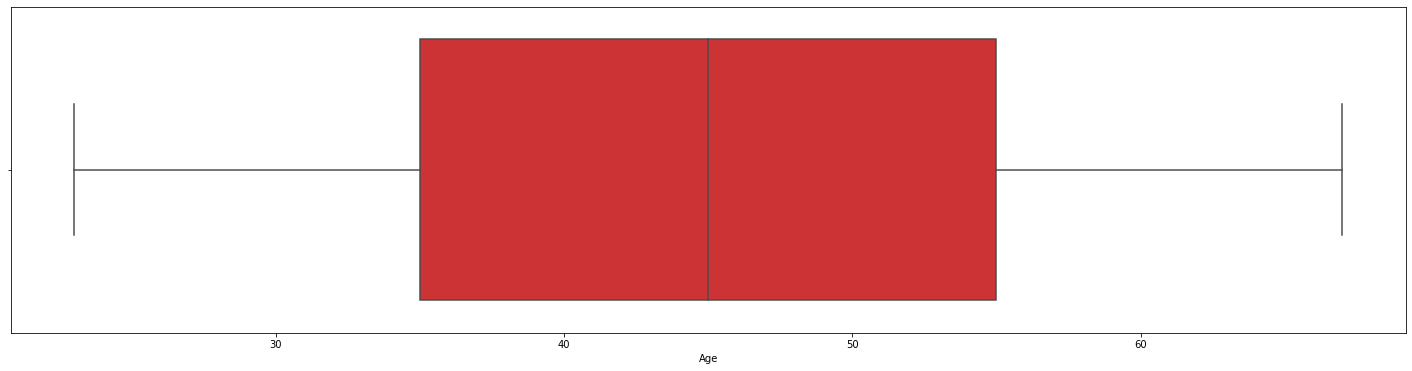

In [11]:
plt.figure(figsize=(25,6))
ax = sb.boxplot(x=df['Age'], orient="h", palette="Set1")

#Age is discrete random variable and it is normally distributed around mean of 45 with standard deviation of 11.46

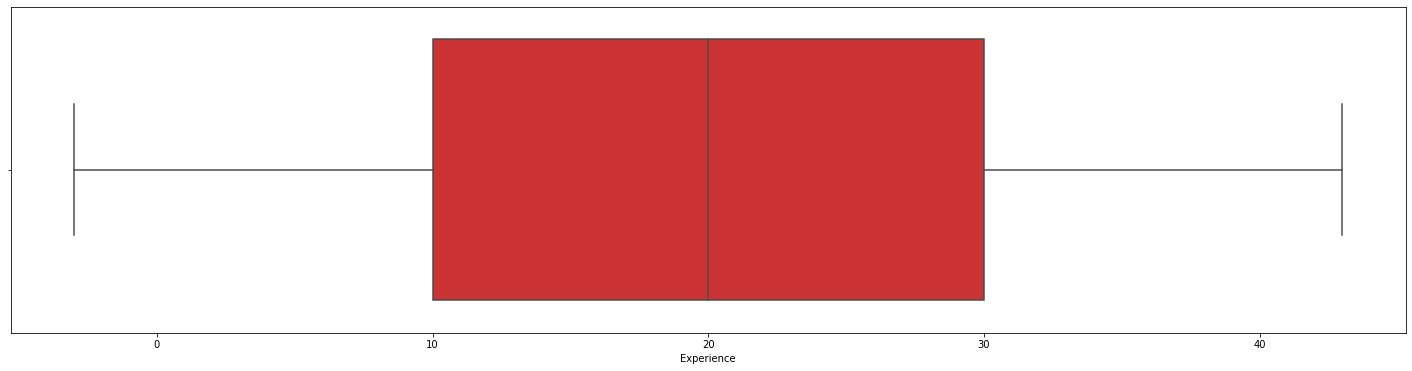

In [12]:
plt.figure(figsize=(25,6))
ax = sb.boxplot(x=df['Experience'], orient="h", palette="Set1")

#Experience is discrete random variable and it is normally distributed around mean of 20 with standard deviation of 11.46

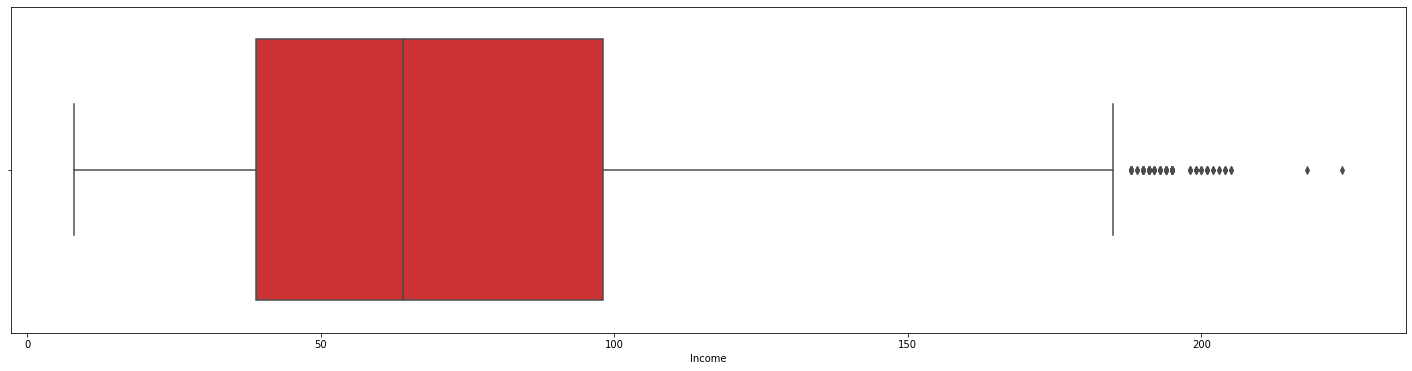

In [13]:
plt.figure(figsize=(25,6))
ax = sb.boxplot(x=df['Income'], orient="h", palette="Set1")
# Income is continuous random variable and it is left skewed, due to the presence of outliers

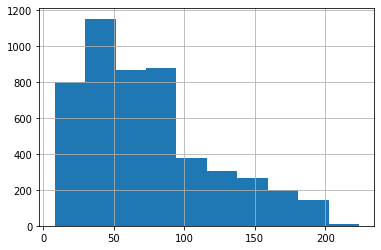

In [14]:
df['Income'].hist()

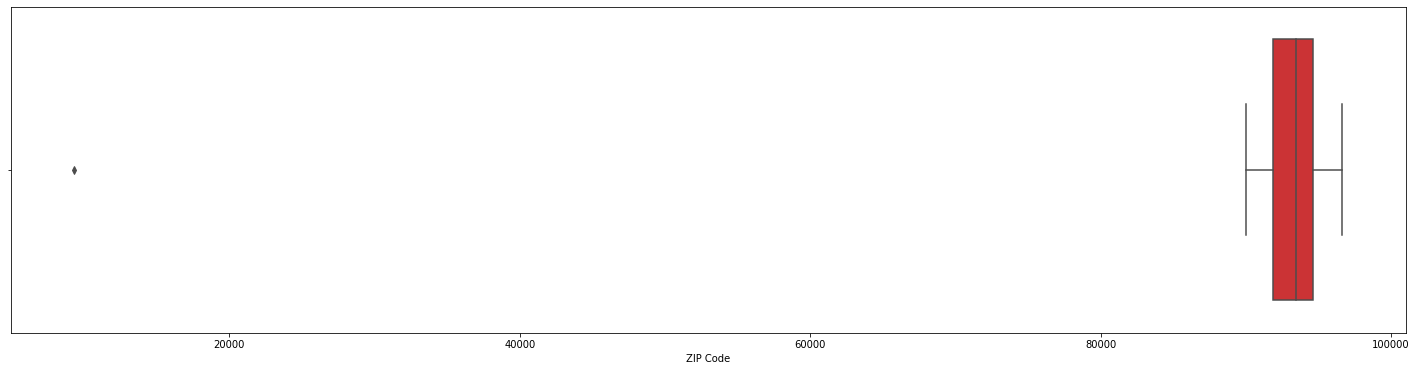

In [15]:
plt.figure(figsize=(25,6))
ax = sb.boxplot(x=df['ZIP Code'], orient="h", palette="Set1")

# Zip code is discrete random variable

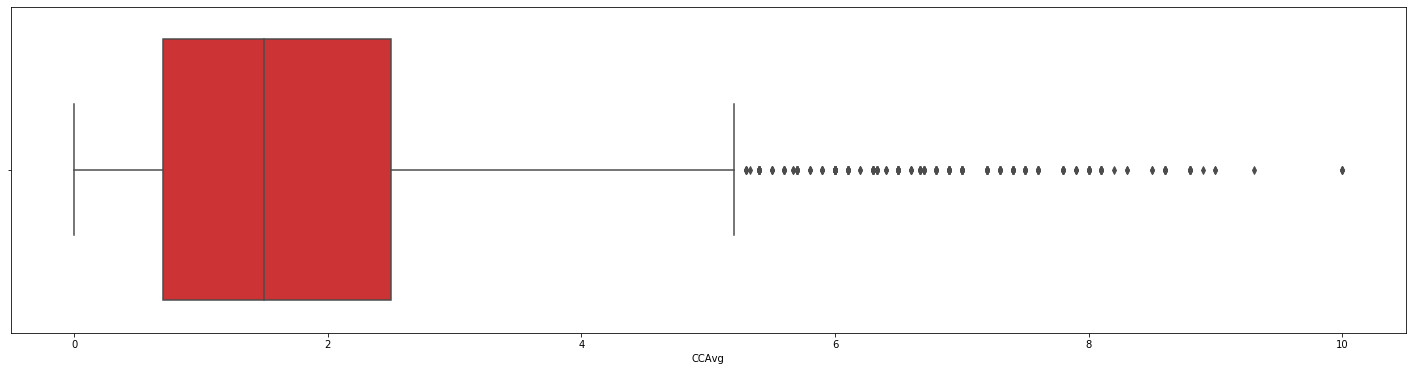

In [16]:
plt.figure(figsize=(25,6))
ax = sb.boxplot(x=df['CCAvg'], orient="h", palette="Set1")

# CCAvg is continuous random variable, and it is left skewed there are outlier on higher end

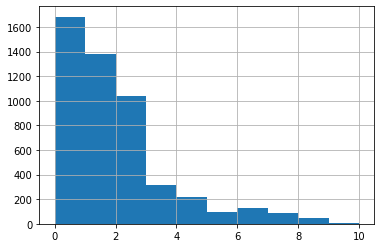

In [17]:
df['CCAvg'].hist()

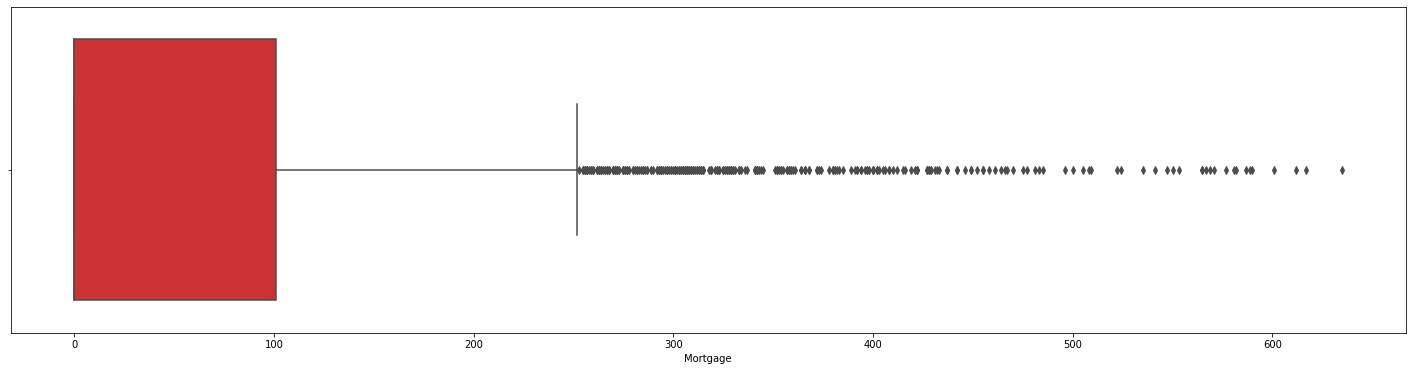

In [18]:
plt.figure(figsize=(25,6))
ax = sb.boxplot(x=df['Mortgage'], orient="h", palette="Set1")

#Mortgage is discrete random variable, 
#The distribution of data is left skwed since there are more number of people without Mortgage (Outliers)

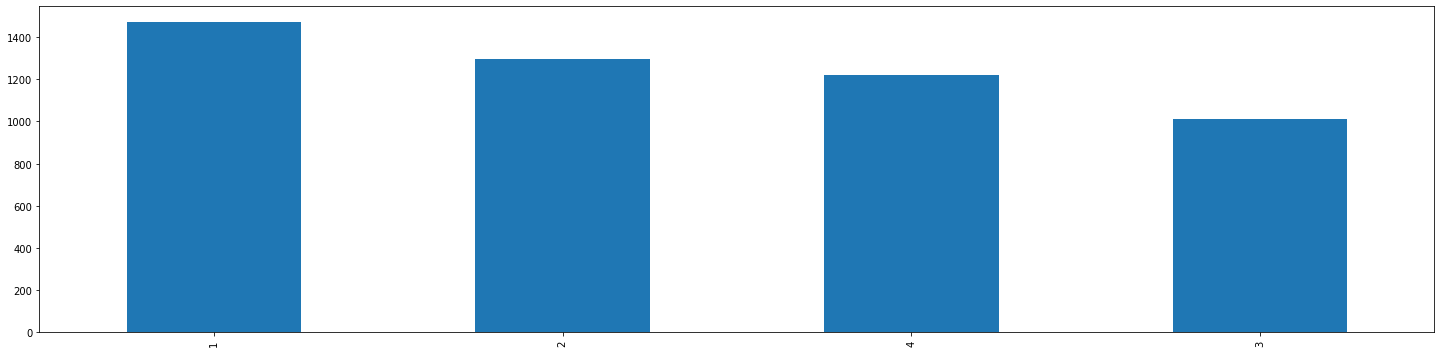

In [19]:
plt.figure(figsize=(25,6))
df.Family.value_counts().plot(kind='bar')

# Family is categorical variable 
# with 1 categorical 1472
# with 2 categorical 1296
# with 3 categorical 1222
# with 4 categorical 1010

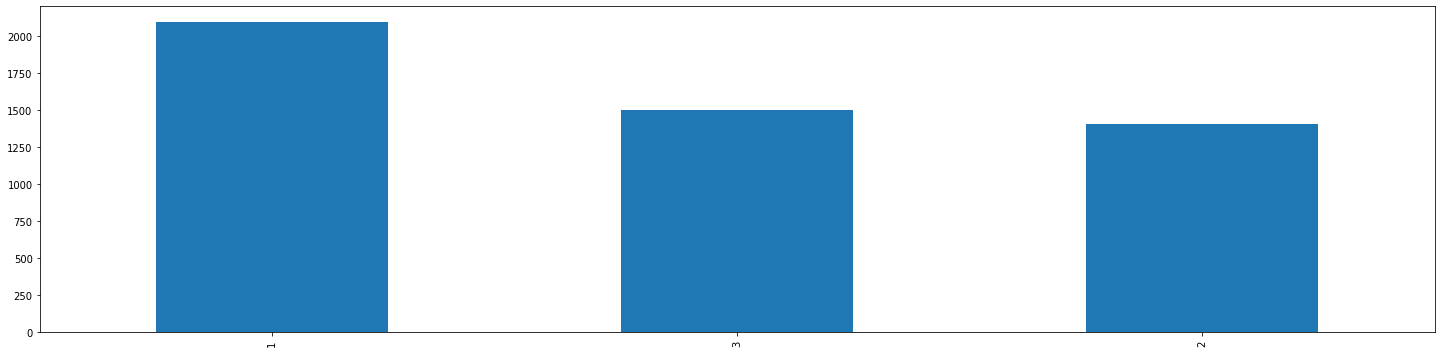

In [20]:
plt.figure(figsize=(25,6))
df.Education.value_counts().plot(kind='bar')
# Education is categorical variable 
# with 1 categorical have 2096
# with 2 categorical have 1501
# with 3 categorical have 1403

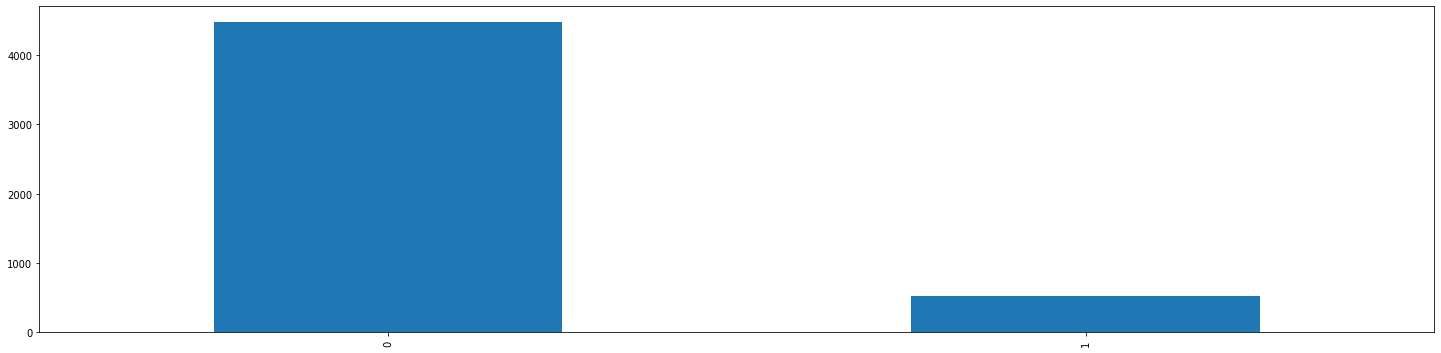

In [21]:
plt.figure(figsize=(25,6))
df['Securities Account'].value_counts().plot(kind='bar')
# Securities Account is categorical variable with more people not taken Securities Account. 
# Securities Account taken persons are 522 out of 5000
# Securities Account not taken persons are 4478 out of 5000

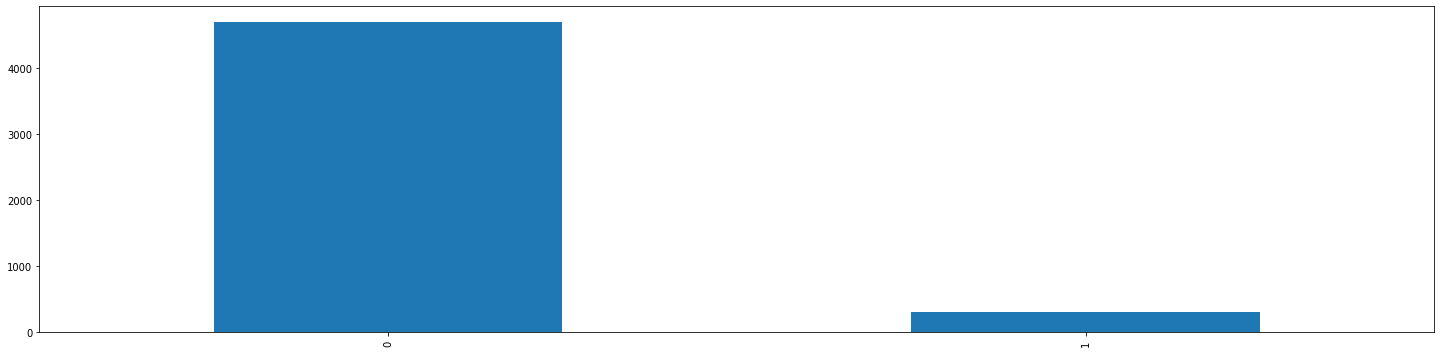

In [22]:
plt.figure(figsize=(25,6))
df['CD Account'].value_counts().plot(kind='bar')
# CD Account is categorical variable with more people not taken CD Account. 
# CD Account taken persons are 302 out of 5000
# CD Account not taken persons are 4698 out of 5000

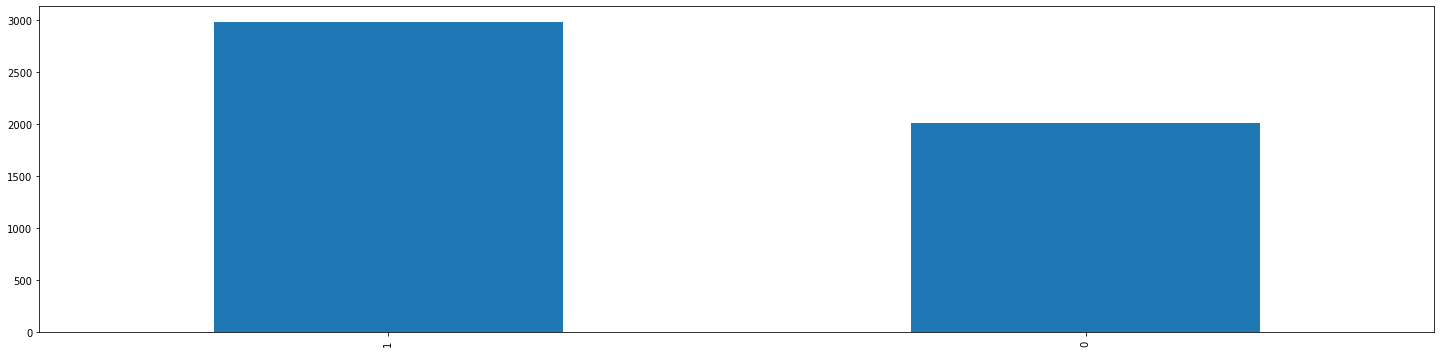

In [23]:
plt.figure(figsize=(25,6))
df['Online'].value_counts().plot(kind='bar')
# Online is categorical variable with more people not taken Online. 
# Online taken persons are 2984 out of 5000
# Online not taken persons are 2016 out of 5000

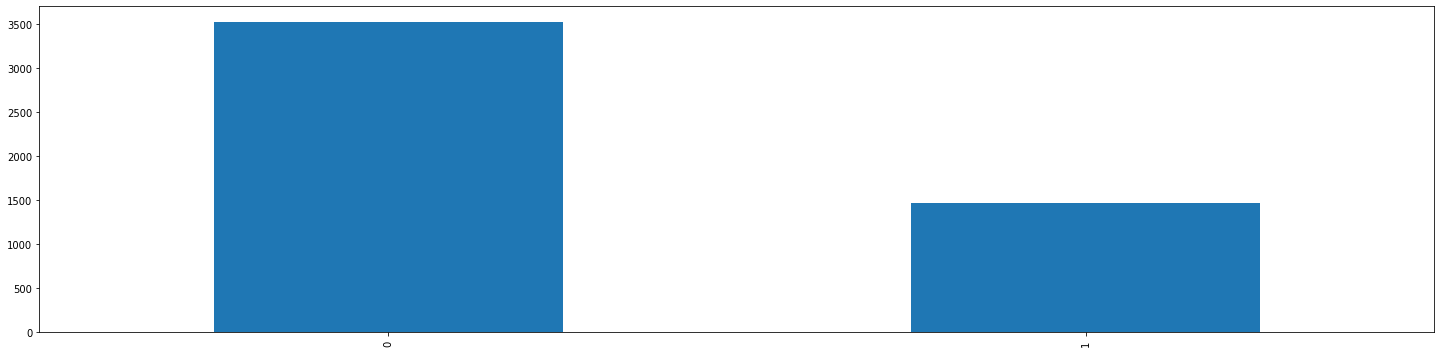

In [24]:
plt.figure(figsize=(25,6))
df['CreditCard'].value_counts().plot(kind='bar')
# CreditCard is categorical variable with more people not taken CreditCard. 
# CreditCard taken persons are 3530 out of 5000
# CreditCard not taken persons are 1470 out of 5000

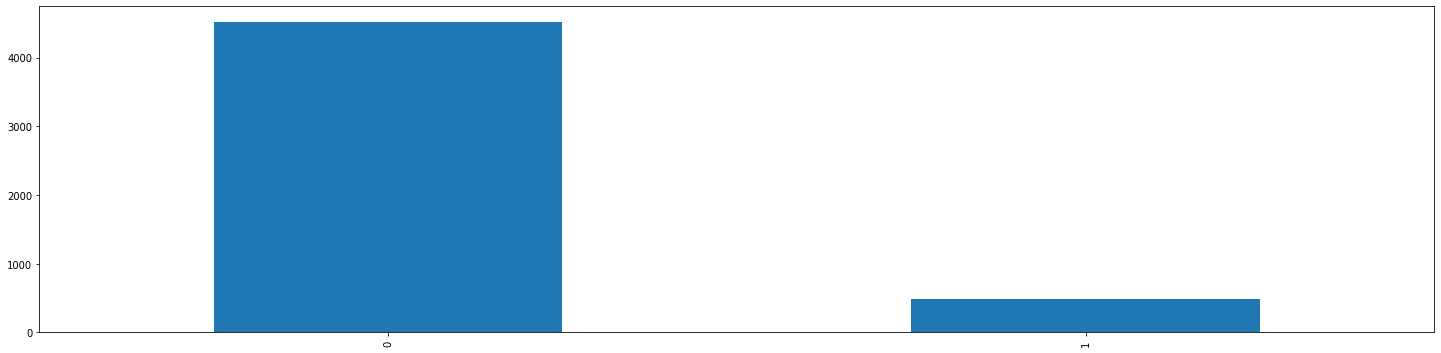

In [25]:
plt.figure(figsize=(25,6))
df['Personal Loan'].value_counts().plot(kind='bar')
# Personal Loan is categorical variable with more people not taken for personal loan. 
# presonal loan taken persons are 480 out of 5000
# personal loan not taken persons are 4520 out of 5000

In [26]:
#3.Get the target column distribution.

In [27]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

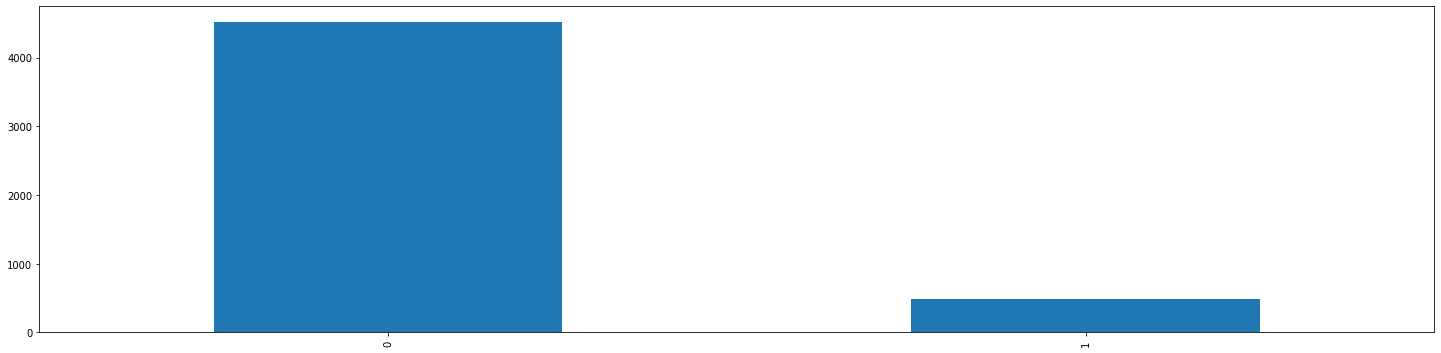

In [28]:
plt.figure(figsize=(25,6))
df['Personal Loan'].value_counts().plot(kind='bar')
# Personal Loan is a categorical variable with only 9.6% opted for personal loan
# People with loan - 480 out of 5000
# People without loan - 4520 out of 5000

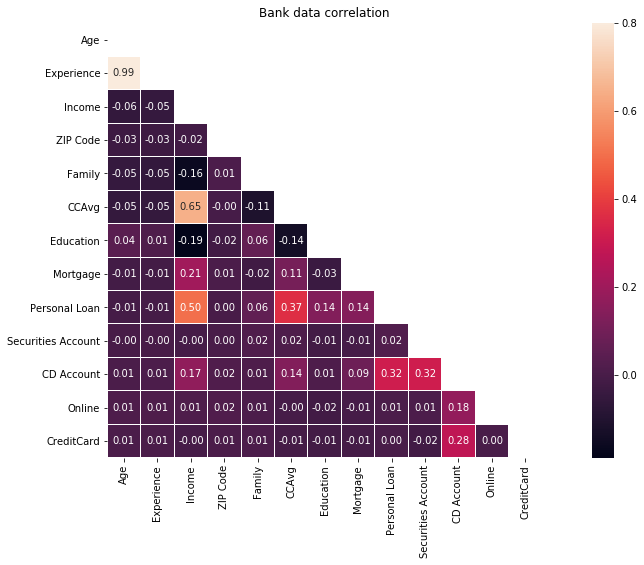

In [29]:
#Correlation between personal loan and Other attributes
from matplotlib import pyplot as plt
plt.figure(figsize=(18, 8))
corr1 = df.corr()
mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True
ax = sb.heatmap(corr1,mask = mask, vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Bank data correlation')
plt.show()

# Personal loan is moderately corrleated with income
# personal loan is moderately corrleated with CCAvg
# Experience is higly correlated with age 
# CCAvg is moderately correlated with income

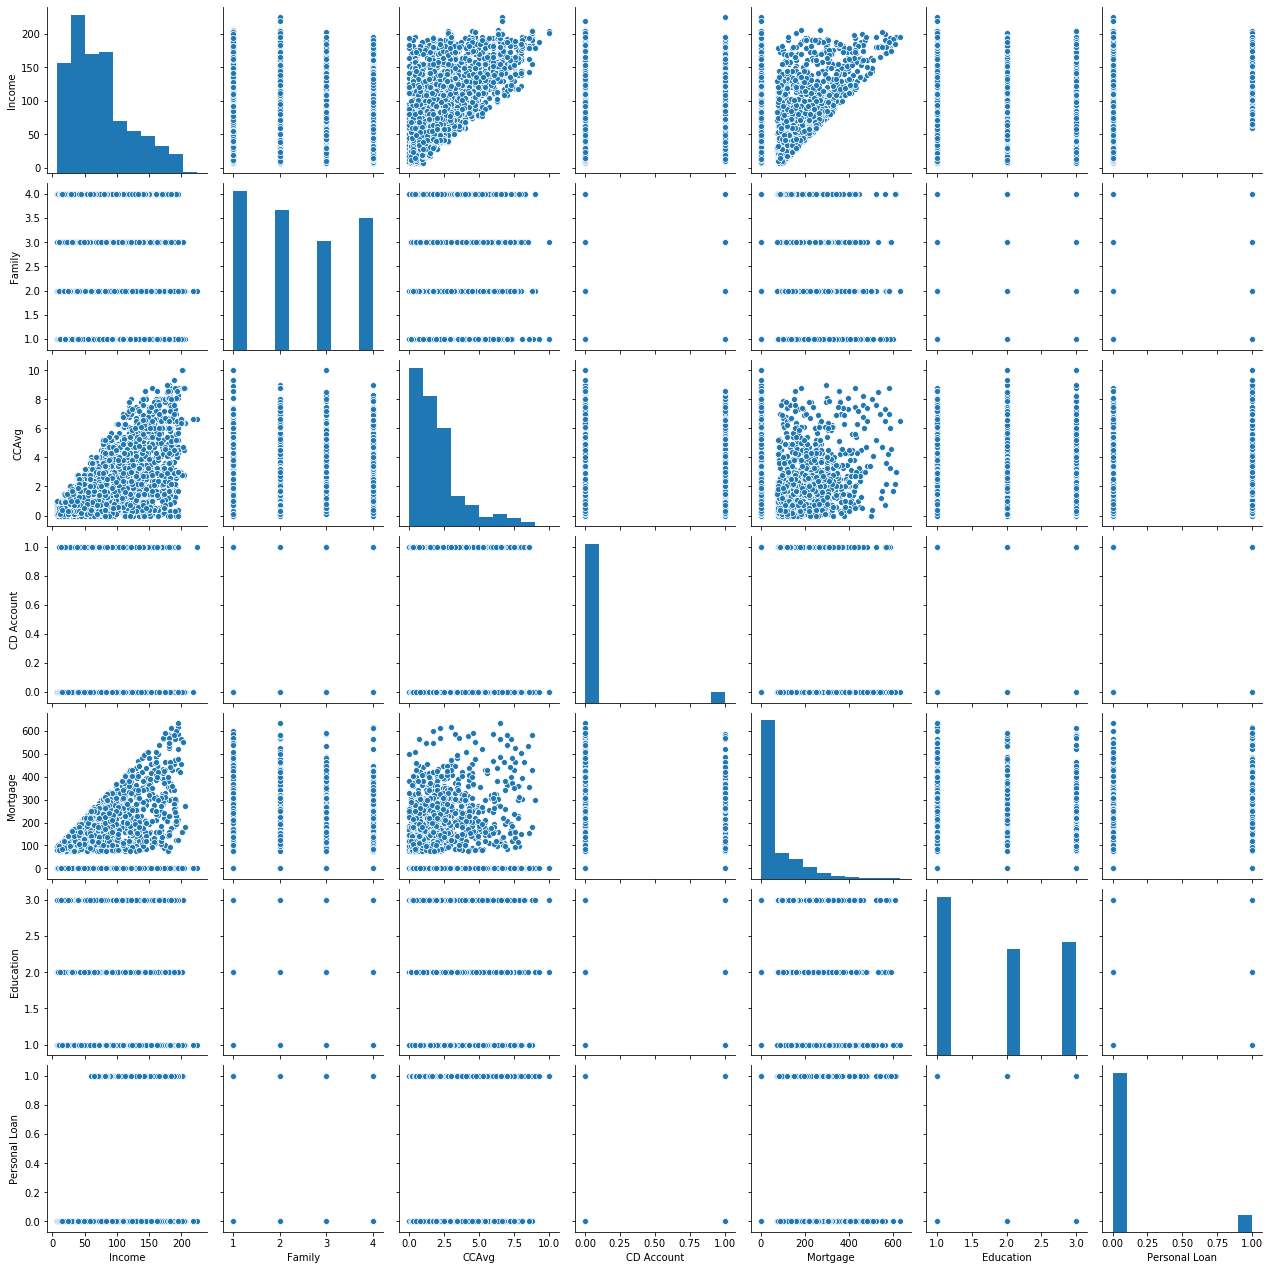

In [31]:
#Analyzing correlation and distribution of positively correlated attributes
h = sb.pairplot(df,vars=["Income","Family", "CCAvg","CD Account","Mortgage","Education","Personal Loan"])

In [32]:
#Crosstabs between Personal Loan and other categorical variables
ct1=pd.crosstab(df['Personal Loan'],df['Family'])
cs1=chi2_contingency(ct1)
print(cs1)
ct2=pd.crosstab(df['Personal Loan'],df['Education'])
cs2=chi2_contingency(ct2)
print(cs2)
ct3=pd.crosstab(df['Personal Loan'],df['Securities Account'])
cs3=chi2_contingency(ct3)
print(cs3)
ct4=pd.crosstab(df['Personal Loan'],df['CD Account'])
cs4=chi2_contingency(ct4)
print(cs4)
ct5=pd.crosstab(df['Personal Loan'],df['Online'])
cs5=chi2_contingency(ct5)
print(cs5)
ct6=pd.crosstab(df['Personal Loan'],df['CreditCard'])
cs6=chi2_contingency(ct6)
print(cs6)
#Personal Loan is associated with Family, Education, CD account as the p-value is below 0.05

(29.676116414854746, 1.6144121228248757e-06, 3, array([[1330.688, 1171.584,  913.04 , 1104.688],
       [ 141.312,  124.416,   96.96 ,  117.312]]))
(111.2398718738913, 6.991473868665428e-25, 2, array([[1894.784, 1268.312, 1356.904],
       [ 201.216,  134.688,  144.096]]))
(2.172310545186504, 0.14051497326319357, 1, array([[4048.112,  471.888],
       [ 429.888,   50.112]]))
(495.90424218782334, 7.398297503329848e-110, 1, array([[4246.992,  273.008],
       [ 451.008,   28.992]]))
(0.1560067212052492, 0.6928599643141485, 1, array([[1822.464, 2697.536],
       [ 193.536,  286.464]]))
(0.021144453920855056, 0.8843861223314504, 1, array([[3191.12, 1328.88],
       [ 338.88,  141.12]]))


In [33]:
#Summary

1.	People with higher income have shown interset in taking Personal loan
2.	Since income and CCAvg are corrleated with each other people with higher CCAvg have shown interest in taking personal loan
3.	Similarly people with higher mortgage have shown interset in taking personal loan
4.	Income and Mortgage are less corrleated.
5.	Age has no impact on personal loan
6.	Since Age and Experience are highly correlated, Experiecne has no impact on personal loan.
7.	Family with 2 and more have shown interest in taking personal loan.
8.	Higher Education people have shown interset in taking personal loan.
9.	Securities Account opting was influenced by personal loan.
10.	People with CD Account have shown interest in taking personal loan.
11.	Online attribute has no influence on personal loan.
12.	CreditCard attribute has no influence on personal loan.

Hence we will consider Income,Mortgage,Family,Education,CCAvg and CD Account column as indepedent variables in our models

In [34]:
lesscol=['Income','Family','CCAvg','Education','Mortgage','CD Account','Personal Loan']
bank_short = df.reindex(columns=lesscol)
bank_short.head()

,Income,Family,CCAvg,Education,Mortgage,CD Account,Personal Loan
ID,,,,,,,
1,49,4,1.6,1,0,0,0
2,34,3,1.5,1,0,0,0
3,11,1,1.0,1,0,0,0
4,100,1,2.7,2,0,0,0
5,45,4,1.0,2,0,0,0


In [35]:
array = bank_short.values
X = array[:,0:6] # select the attributes
Y = array[:,6]   # select the predictor
print(X,Y)

[[49.   4.   1.6  1.   0.   0. ]
 [34.   3.   1.5  1.   0.   0. ]
 [11.   1.   1.   1.   0.   0. ]
 ...
 [24.   2.   0.3  3.   0.   0. ]
 [49.   3.   0.5  2.   0.   0. ]
 [83.   3.   0.8  1.   0.   0. ]] [0. 0. 0. ... 0. 0. 0.]


In [36]:
test_size = 0.30 # taking 70:30 training and test set
seed = 2  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [37]:
X_train

array([[32. ,  1. ,  0.3,  3. , 80. ,  0. ],
       [53. ,  2. ,  1.6,  3. ,  0. ,  0. ],
       [71. ,  1. ,  1.4,  3. ,  0. ,  0. ],
       ...,
       [25. ,  2. ,  0.1,  2. , 91. ,  0. ],
       [ 9. ,  2. ,  0. ,  3. , 96. ,  0. ],
       [41. ,  3. ,  0.5,  3. ,  0. ,  0. ]])

In [38]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
#Logistic regression
Logistic_regression_model = LogisticRegression()
Logistic_regression_model.fit(X_train, y_train)
y_predict_LR = Logistic_regression_model.predict(X_test)
model_score_LR = Logistic_regression_model.score(X_test, y_test)
model_accuracy_LR = metrics.accuracy_score(y_test,y_predict_LR)
cr_LR=metrics.classification_report(y_test,y_predict_LR)
model1=Logistic_regression_model.fit(X_train, y_train)
print("Model: beta-coefficients")
print(model1.coef_)
print('Model score:{}'.format(model_score_LR))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_predict_LR))
print('Model Accuracy:{}'.format(model_accuracy_LR))
print("Classification report:")
print(cr_LR)

Model: beta-coefficients
[[5.90146145e-02 8.13990446e-01 9.19842709e-02 1.73991624e+00
  6.59505140e-04 2.32232292e+00]]
Model score:0.94
Confusion matrix:
[[1339   23]
 [  67   71]]
Model Accuracy:0.94
Classification report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1362
         1.0       0.76      0.51      0.61       138

    accuracy                           0.94      1500
   macro avg       0.85      0.75      0.79      1500
weighted avg       0.93      0.94      0.93      1500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [40]:
#Naive Bayes
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)
y_predict_NB=NB_model.predict(X_test)
model_score_NB = NB_model.score(X_test, y_test)
model_accuracy_NB = metrics.accuracy_score(y_test,y_predict_NB)
cr_NB=metrics.classification_report(y_test,y_predict_NB)
print('Model score:{}'.format(model_score_NB))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_predict_NB))
print('Model Accuracy:{}'.format(model_accuracy_NB))
print("Classification report:")
print(cr_NB)

Model score:0.8906666666666667
Confusion matrix:
[[1264   98]
 [  66   72]]
Model Accuracy:0.8906666666666667
Classification report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1362
         1.0       0.42      0.52      0.47       138

    accuracy                           0.89      1500
   macro avg       0.69      0.72      0.70      1500
weighted avg       0.90      0.89      0.90      1500



In [41]:
#KNN
NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance', metric='euclidean') #n=10 gave best accuracy and recall rate
NNH.fit(X_train,y_train)
y_predict_KNN=NNH.predict(X_test)
model_score_KNN = NNH.score(X_test, y_test)
model_accuracy_KNN = metrics.accuracy_score(y_test,y_predict_KNN)
cr_KNN=metrics.classification_report(y_test,y_predict_KNN)
print('Model score:{}'.format(model_score_KNN))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_predict_KNN))
print('Model Accuracy:{}'.format(model_accuracy_KNN))
print("Classification report:")
print(cr_KNN)

Model score:0.9333333333333333
Confusion matrix:
[[1340   22]
 [  78   60]]
Model Accuracy:0.9333333333333333
Classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1362
         1.0       0.73      0.43      0.55       138

    accuracy                           0.93      1500
   macro avg       0.84      0.71      0.75      1500
weighted avg       0.93      0.93      0.93      1500



In [42]:
#SVC
model_SVC=SVC(kernel='rbf',C = 1000) #model with kernel = rbf yielded better results than linear kernal
model_SVC.fit(X_train,y_train)
y_predict_SVC = model_SVC.predict(X_test)
model_score_SVC = model_SVC.score(X_test, y_test)
model_accuracy_SVC = metrics.accuracy_score(y_test,y_predict_SVC)
cr_SVC=metrics.classification_report(y_test,y_predict_SVC)
print('Model score:{}'.format(model_score_SVC))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_predict_SVC))
print('Model Accuracy:{}'.format(model_accuracy_SVC))
print("Classification report:")
print(cr_SVC)

Model score:0.962
Confusion matrix:
[[1353    9]
 [  48   90]]
Model Accuracy:0.962
Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1362
         1.0       0.91      0.65      0.76       138

    accuracy                           0.96      1500
   macro avg       0.94      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [43]:
#Standardize the scores to check if the results improve
lesscol_fea=['Income','Family','CCAvg','Education','Mortgage','CD Account']
bank_fea = df.reindex(columns=lesscol_fea)
bank_fea.head()

,Income,Family,CCAvg,Education,Mortgage,CD Account
ID,,,,,,
1,49,4,1.6,1,0,0
2,34,3,1.5,1,0,0
3,11,1,1.0,1,0,0
4,100,1,2.7,2,0,0
5,45,4,1.0,2,0,0


In [44]:
bank_feature_df_z = bank_fea.apply(zscore)
X = np.array(bank_feature_df_z)

In [45]:
Y = np.array(df['Personal Loan'])
print(X,Y)

[[-0.53822878  1.39741398 -0.19337053 -1.04907792 -0.55552393 -0.25354028]
 [-0.8641094   0.52599094 -0.25059542 -1.04907792 -0.55552393 -0.25354028]
 [-1.36379301 -1.21685513 -0.53671986 -1.04907792 -0.55552393 -0.25354028]
 ...
 [-1.08136314 -0.34543209 -0.93729408  1.33248376 -0.55552393 -0.25354028]
 [-0.53822878  0.52599094 -0.82284431  0.14170292 -0.55552393 -0.25354028]
 [ 0.20043396  0.52599094 -0.65116964 -1.04907792 -0.55552393 -0.25354028]] [0 0 0 ... 0 0 0]


In [46]:
test_size = 0.30 # taking 70:30 training and test set
seed = 2  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)
print(X_train,y_train)

[[-0.90756014 -1.21685513 -0.93729408  1.33248376  0.23107533 -0.25354028]
 [-0.45132728 -0.34543209 -0.19337053  1.33248376 -0.55552393 -0.25354028]
 [-0.06027053 -1.21685513 -0.30782031  1.33248376 -0.55552393 -0.25354028]
 ...
 [-1.05963777 -0.34543209 -1.05174386  0.14170292  0.33923273 -0.25354028]
 [-1.40724376 -0.34543209 -1.10896875  1.33248376  0.38839518 -0.25354028]
 [-0.71203177  0.52599094 -0.82284431  1.33248376 -0.55552393 -0.25354028]] [0 0 0 ... 0 0 0]


In [47]:
#Logistic regression
Logistic_regression_model = LogisticRegression()
Logistic_regression_model.fit(X_train, y_train)
y_predict_LR = Logistic_regression_model.predict(X_test)
model_score_LR = Logistic_regression_model.score(X_test, y_test)
model_accuracy_LR = metrics.accuracy_score(y_test,y_predict_LR)
cr_LR=metrics.classification_report(y_test,y_predict_LR)
model1=Logistic_regression_model.fit(X_train, y_train)
print("Model: beta-coefficients")
print(model1.coef_)
print('Model score:{}'.format(model_score_LR))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_predict_LR))
print('Model Accuracy:{}'.format(model_accuracy_LR))
print("Classification report:")
print(cr_LR)

Model: beta-coefficients
[[2.68212168 0.92128588 0.16966195 1.45967955 0.06751306 0.58463321]]
Model score:0.9413333333333334
Confusion matrix:
[[1341   21]
 [  67   71]]
Model Accuracy:0.9413333333333334
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1362
           1       0.77      0.51      0.62       138

    accuracy                           0.94      1500
   macro avg       0.86      0.75      0.79      1500
weighted avg       0.94      0.94      0.94      1500



In [48]:
#Naive Bayes
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)
y_predict_NB=NB_model.predict(X_test)
model_score_NB = NB_model.score(X_test, y_test)
model_accuracy_NB = metrics.accuracy_score(y_test,y_predict_NB)
cr_NB=metrics.classification_report(y_test,y_predict_NB)
print('Model score:{}'.format(model_score_NB))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_predict_NB))
print('Model Accuracy:{}'.format(model_accuracy_NB))
print("Classification report:")
print(cr_NB)

Model score:0.8906666666666667
Confusion matrix:
[[1264   98]
 [  66   72]]
Model Accuracy:0.8906666666666667
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1362
           1       0.42      0.52      0.47       138

    accuracy                           0.89      1500
   macro avg       0.69      0.72      0.70      1500
weighted avg       0.90      0.89      0.90      1500



In [49]:
#KNN
NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance', metric='euclidean') #n=10 
NNH.fit(X_train,y_train)
y_predict_KNN=NNH.predict(X_test)
model_score_KNN = NNH.score(X_test, y_test)
model_accuracy_KNN = metrics.accuracy_score(y_test,y_predict_KNN)
cr_KNN=metrics.classification_report(y_test,y_predict_KNN)
print('Model score:{}'.format(model_score_KNN))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_predict_KNN))
print('Model Accuracy:{}'.format(model_accuracy_KNN))
print("Classification report:")
print(cr_KNN)

Model score:0.966
Confusion matrix:
[[1361    1]
 [  50   88]]
Model Accuracy:0.966
Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1362
           1       0.99      0.64      0.78       138

    accuracy                           0.97      1500
   macro avg       0.98      0.82      0.88      1500
weighted avg       0.97      0.97      0.96      1500



In [50]:
#SVC
model_SVC=SVC(kernel='rbf',C = 1000) #model with kernel = rbf yielded better results than linear kernal
model_SVC.fit(X_train,y_train)
y_predict_SVC = model_SVC.predict(X_test)
model_score_SVC = model_SVC.score(X_test, y_test)
model_accuracy_SVC = metrics.accuracy_score(y_test,y_predict_SVC)
cr_SVC=metrics.classification_report(y_test,y_predict_SVC)
print('Model score:{}'.format(model_score_SVC))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_predict_SVC))
print('Model Accuracy:{}'.format(model_accuracy_SVC))
print("Classification report:")
print(cr_SVC)

Model score:0.976
Confusion matrix:
[[1348   14]
 [  22  116]]
Model Accuracy:0.976
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1362
           1       0.89      0.84      0.87       138

    accuracy                           0.98      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.98      0.98      0.98      1500



Conclusion:
Based on initial exploration, it seems the aspects such as Income,Mortgage,Family,Education,CCAvg and CD Account has association with whether the consumer has accepted the loan or not. 

Results with original data (no transformation)
1.	Accuracy rate of all models are quite high
2.	Precision rate was high for logistic regression, KNN and SVC
3.	Recall rate in general was low for all models

Results with transformed data
1.	Accuracy rate is high for all models
2.	Precision rate is high for logistic regression, KNN and SVC (highest for KNN)
3.	Recall rate improved after transformation
4.	Recall rate is highest for SVC model 

We suggest to use the SVC model (with kernal = rbf) as that yielded best accuracy, recall and precision rates